# El objetivo de este archivo es la implementación de pruebas unitarias de las clases Complejo y Matriz

In [6]:
%run COMPLEJO.ipynb
%run VECTOR_MATRIZ.ipynb



['12.00']
['4.00 +4.00i']
['0.00']
['-8.00 +20.00i']
['3.00 -3.00i']
['2.00']
['0.00']
['3.00 +7.00i']


In [7]:
import unittest
import math
import matplotlib.pyplot as plt
import numpy as np

In [8]:
class ComplejosTest(unittest.TestCase): 
    
    def test_deberiaSumarZero(self):
        a = Complejo(0,0)
        self.assertEqual(a, Complejo(99,-99)+Complejo(-99,99))
        self.assertEqual(a,  Complejo(-0, 1)+Complejo(+0,-1))
        self.assertEqual(a, Complejo(+0,+0)+Complejo(-0,-0))
    
    def test_deberiaSumarBien(self):
        self.assertEqual(Complejo(99,0), Complejo(44,55)+ Complejo(55,-55) )
        self.assertEqual(Complejo(0,1), Complejo(0,2)+Complejo(0,-1))
        self.assertEqual(Complejo(-math.pi,0), Complejo(3.1415926535897931159979635,0)+ Complejo(2*-3.1415926535897931159979635,0))
    
    def test_deberiaRestarZero(self):
        a = Complejo(0,0)
        self.assertEqual(a, Complejo(99,-99)-Complejo(99,-99))
        self.assertEqual(a,  Complejo(-0, 1)-Complejo(-0,1))
        self.assertEqual(a, Complejo(+0,+0)+Complejo(-0,-0))
    
    def test_deberiaRestarBien(self):
        self.assertEqual(Complejo(99,0), Complejo(44,55)- Complejo(-55,55) )
        self.assertEqual(Complejo(0,1), Complejo(0,2)-Complejo(-0,--1))
        self.assertEqual(Complejo(-math.pi,3), Complejo(3.1415926535897931159979635,1)- Complejo(2*3.1415926535897931159979635,-2))
    
    def test_deberiaMultiplicarBien(self):
        self.assertEqual(Complejo(10627.775100,-19363.2979000), Complejo(5543,-133)*Complejo(2,-3.4453))
        a = math.pi
        #A * A'  = A^2 
        self.assertEqual(Complejo(2*a*a,0), Complejo(a,-a)* Complejo(a,a))
        self.assertEqual(Complejo(0,288), Complejo(12,12)*Complejo(12,12))
        
        
    def test_deberiaDarexcepcionZero(self):
        try:
            Complejo(1,1)/Complejo(0,0)
            self.assertTrue(False)
        except(ZeroDivisionError):
            self.assertTrue(True)
    def test_deberiaDividirBien(self):
        self.assertEqual(Complejo(-53/130, 367/260), Complejo(1,-67)/Complejo(-44,12))
        a = math.pi
        self.assertEqual(Complejo(0,-1), Complejo(a,-a)/ Complejo(a,a))
        self.assertEqual(Complejo(1,0), Complejo(12,12)/Complejo(12,12))
        
    def test_deberiaModulo(self):
        self.assertEqual(math.sqrt(3*3+4*4), Complejo(3,-4).modulo())
        self.assertEqual(0,Complejo(0,0).modulo())
        self.assertEqual(2*math.sqrt(2), Complejo(-2,-2).modulo())
        self.assertEqual(math.sqrt(100*100+1), Complejo(100,1).modulo())
        
    def test_deberiaConjugado(self):
        a = math.pi
        self.assertEqual(Complejo(-a,a), Complejo(-a,-a).conjugado())
        self.assertEqual(Complejo(0,0), Complejo(0,0).conjugado())
        self.assertEqual(Complejo(666,-666), Complejo(666,666).conjugado())
        
    def test_deberiaPolar(self):
        b  = Complejo(100, 0, False)
        self.assertTrue(not b.cartesiana)
        a= Complejo(100,0)
        self.assertEqual(a, b)
        self.assertTrue(abs(0- a.polares().parteImaginaria)<Complejo.TOLERANCIA)
        a= Complejo(-100,0)
        self.assertTrue(abs(180- a.polares().parteImaginaria)<Complejo.TOLERANCIA)
        a= Complejo(0,209)
        self.assertTrue(abs(90- a.polares().parteImaginaria)<Complejo.TOLERANCIA)
        a= Complejo(0,-105)
        self.assertTrue(abs(270- a.polares().parteImaginaria)<Complejo.TOLERANCIA)
        
        a= Complejo(100,1)
        self.assertTrue(abs(math.atan(a.parteImaginaria/a.parteReal)*180/math.pi- a.polares().parteImaginaria)<Complejo.TOLERANCIA)
        a = Complejo(-50,60)
        self.assertTrue(abs(math.atan(a.parteImaginaria/a.parteReal)*180/math.pi+ 180- a.polares().parteImaginaria)<Complejo.TOLERANCIA)
        a = Complejo(-50,-50)
        self.assertTrue(abs(math.atan(a.parteImaginaria/a.parteReal)*180/math.pi+ 180- a.polares().parteImaginaria)<Complejo.TOLERANCIA)
        a = Complejo(50,-1800)
        self.assertTrue(abs(math.atan(a.parteImaginaria/a.parteReal)*180/math.pi+ +360- a.polares().parteImaginaria)<Complejo.TOLERANCIA)
        
        self.assertTrue(math.sqrt(50*50+1800**2)==a.modulo())
        
    def test_deberiaCartesiano(self):
        a = Complejo(0,100)
        b = a.polares()
        self.assertEqual(b.cartesianas(),a)
        
        a = Complejo(-55,100)
        b = a.polares()
        self.assertEqual(b.cartesianas(),a)
        a = Complejo(11,0)
        b = a.polares()
        self.assertEqual(b.cartesianas(),a)
        a = Complejo(0,math.pi)
        b = a.polares()
        self.assertEqual(b.cartesianas(),a)
        
        a = Complejo(0,0)
        b = a.polares()
        self.assertEqual(b.cartesianas(), a)
        
        
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(ComplejosTest))


...........
----------------------------------------------------------------------
Ran 11 tests in 0.006s

OK


<unittest.runner.TextTestResult run=11 errors=0 failures=0>

In [14]:
class MatrizTest(unittest.TestCase): 
    #1 Suma de vectores complejos
    def test_deberiaSumarVectores(self):
        a = Matriz(3,1, [[(8,3)], [(-1,-4)], [(0,-9)]])
        b = Matriz(3,1, [[(8,-3)], [(2,5)], [(3,0)]])
        c = Matriz(3,1, [[(16,0)], [(1,1)], [(3,-9)]])
        self.assertEqual(c, a+b)
    #2 Inverso aditivo de vector complejo
    def test_deberiaInversoVector(self):
        a = Matriz(3,1, [[(-5,2)], [(3,0)], [(0,-1)]])
        b = Matriz(3,1, [[(5,-2)], [(-3,0)], [(0,1)]])
        self.assertEqual(a.inversa(), b)
    
    #3 Multiplicación de escalar por vector complejo
    def test_deberiaMultiplicarEscalarVector(self):
        a = Matriz(3,1, [[(-2,5)], [(-1,-1)], [(2,-9)]])
        b = Matriz(3,1, [[(-3,-7)], [(2,0)], [(7,11)]])
        self.assertEqual(a*Complejo(-1,1), b)
    
    #4 Suma de matrices complejas
    def test_deberiaSumarMatrices(self):
        a = Matriz(3,3 ,[[(-8,-3), (-6,-4), (0,-4)], [(-1,8), (6,-10), (8,-5)], [(4,0), (8,5), (-7,-9)]])
        b = Matriz(3,3 ,[[(-7,-2), (-4,-2), (7,7)], [(5,9), (0,3), (6,-5)], [(1,5), (-6,-6), (5,8)]])
        c = Matriz(3,3 ,[[(-15,-5), (-10,-6), (7,3)], [(4,17), (6,-7), (14,-10)], [(5,5), (2,-1), (-2,-1)]])
        self.assertEqual(a+b,c)
    #5 Inverso aditivo de matriz compleja
    def test_deberiaInversoMatriz(self):
        a = Matriz(2,2, [[(7,3),(-1,7)],[(-9,-4),(-7,-9)]])
        b = Matriz(2,2, [[(-7,-3),(--1,-7)],[(--9,--4),(--7,--9)]])
        self.assertEqual(a.inversa(),b)
    #6 Multiplicación de escalar por matriz compleja
    def test_deberiaMultiplicarEscalarMatriz(self):
        a = Matriz(2,2, [[(3,-2),(8,-4)],[(4,-10),(-2,-8)]])
        b = Matriz(2,2, [[(0,13),(-4,32)],[(22,32),(28,10)]])
        self.assertEqual(a*Complejo(-2,3), b)
    
    #7  Transpuesta de matriz compleja
    def test_deberiaTransponerMatriz(self):
        a = Matriz(2,3,[[(5,9), (-7,-5), (-1, -4)], [(8,2),(-3,-7), (7, -8)]])
        b = Matriz(3,2,[[(5,9),(8,2)],[(-7,-5), (-3,-7)], [(-1, -4), (7, -8)]])
        self.assertEqual(a.transpuesta(), b)
    
    #8 Conjugada de matriz compleja
    def test_deberiaConjugar(self):
        a = Matriz(2,2, [[(-6,1),(3,8)],[(2,-6),(3,0)]])
        b = Matriz(2,2, [[(-6,-1),(3,-8)],[(2,--6),(3,-0)]])
        self.assertEqual(a.conjugada(), b)
    #9 Adjunta (daga) de matriz compleja
    def test_deberiaAdjuntaMatriz(self):
        a = Matriz(2,3,[[(7,7), (3,8), (8, 4)], [(5,0),(8,-6), (-10, -1)]])
        b = Matriz(3,2,[[(7,-7),(5,0)],[(3,-8), (8,6)], [(8, -4), (-10, 1)]])
        self.assertEqual(a.adjunta(), b)
    #10 Producto de matrices complejas 
    def test_deberiaProductoMatriz(self):
        a = Matriz(3,3 ,[[(-6,2) ,(0,6), (7,2)], [(6,9), (7,7), (-6,-6)], [(5,8), (-6,8), (6,9)]])
        b = Matriz(3,3 ,[[(9,-6), (-3,-4), (5,-2)], [(3,6), (-1,-5), (0,-5)], [(9,9), (8,-4), (-8,-4)]])
        c = Matriz(3,3 ,[[(-33,153), (120,0), (-44,-22)], [(87,0), (-26,-117), (107,70)], [(0,165), (147,26), (69,-36)]])
        self.assertEqual(a*b,c)
        
        d = Matriz(3,3 ,[[(2,1), (3,0), (1,-1)], [(0,0), (0,-2), (7,-3)], [(3,0), (0,0), (1,-2)]])
        e = Matriz(2,2, [[(0,-1),(1,0)],[(0,0),(0,1)]])
        try:
            d*e
            self.assertTrue(False)
        except(Exception):
            self.assertTrue(True)
    #11 Acción de matriz compleja sobre vector complejo
    def test_deberiaAccion(self):
        a = Matriz(3,3, [[(-1,5),(1,-7),(-6,3)], [(-3,-9),(2,-5),(1,-10)], [(-6,5),(6,-5),(3,-2)]])
        b = Matriz(3,1, [[(1,-3),], [(4,3)], [(-3,1)]])
        c = Matriz(3,1, [[(54,-32),], [(0,17)], [(41,30)]])
        self.assertEqual(b.accion(a), c)
            
            
    #12 Producto interno de vectores complejos
    def test_deberiaProductoInterno(self):
        a = Matriz(3,1, [[(2,-1)],[(-8,-5)],[(-2,-6)]])
        b = Matriz(3,1, [[(6,-3)],[(5,-1)],[(-6,-2)]])
        self.assertEqual(Complejo(4,1), a.productoInterno(b))
        
        b = Matriz(3,2, [[(6,-3), (1,1)],[(5,-1), (1,1)],[(-6,-2), (1,1)]])
        try:
            a.productoInterno(b)
            self.assertTrue(False)
        except Exception as e:
            self.assertTrue(str(e) == "No son vectores")
        
        b = Matriz(4,1, [[(6,-3)],[(5,-1)],[(-6,-2)] ,[(1,1)]])
        try:
            a.productoInterno(b)
            self.assertTrue(False)
        except Exception as e:
            self.assertTrue(str(e) == "El numero de columnas de la primera debe ser igual al numero de filas de la segunda")
    #13 Norma de vector complejo
    def test_deberiaNormaVector(self):
        a = Matriz(3,1, [[(4,5)],[(3,1)],[(0,-7)]])
        self.assertEqual(a.norma(), 10)
        
    #14 Distancia entre dos vectores complejos
    def test_deberiaDistancia(self):
        a = Matriz(3,1,[[(2,7)],[(4,-1)],[(2,-4)]])
        b = Matriz(3,1, [[(7,8)], [(2,-8)], [(1,4)]])
        self.assertEqual(12, b.distancia(a))
        b = Matriz(4,1, [[(7,8)], [(2,-8)], [(1,4)], [(1,1)]])
        try:
            b.distancia(a)
            self.assertTrue(False)
        except Exception as e:
            self.assertTrue(str(e) == "Deben ser vectores y del mismo tamaño")
        b = Matriz(3,2, [[(6,-3), (1,1)],[(5,-1), (1,1)],[(-6,-2), (1,1)]])
        try:
            b.distancia(a)
            self.assertTrue(False)
        except Exception as e:
            self.assertTrue(str(e) == "Deben ser vectores y del mismo tamaño")
        a = Matriz(2,1, [[(9,-7)],[(-1,-6)]])
        b = Matriz(2,1, [[(7,-8)],[(5,-9)]])
        self.assertEqual(math.sqrt(50), b.distancia(a))
        self.assertEqual(math.sqrt(0), a.distancia(a))
    #15 ¿Es la matriz compleja una matriz unitaria?
    def test_deberiaSerUnitaria(self):
        r = math.sqrt(2)
        a = Matriz(2,2, [[(1/r,0),(0,1/r)],[(0,1/r),(1/r,0)]])
        self.assertTrue(a.esUnitaria())
        
        b = Matriz(3,3, [[(0,1),(1,0),(0,0)],[(0,0),(0,1),(1,0)], [(1,0),(0,0),(0,1)]])
        self.assertFalse(b.esUnitaria())
    #16 ¿Es la matriz compleja una matriz hermitiana?    
    def test_deberiaSerHermitiana(self):
        a = Matriz(3,3, [[(3,0),(2,-1),(0,-3)],[(2,1),(0,0),(1,-1)], [(0,3),(1,1),(0,0)]])
        self.assertTrue(a.esHermitiana())
        a = Matriz(2,2, [[(1,0),(3,-1)],[(3,1),(0,1)]])
        self.assertFalse(a.esHermitiana())
        
        
    #17 Producto tensorial de matrices complejas
    def test_deberiaProductoTensor(self):
        a = Matriz(2,2,[[(1,1), (0,0)],[(1,0), (0,1)]])
        b = Matriz(3,3, [[(-1,2), (-2,-2),(0,2)],[(2,3), (3,1), (2,2)],[(-2,1), (1,-1), (2,1)]])
        f1=[(-3,1),(0,-4), (-2,2), (0,0), (0,0), (0,0)]
        f2=[(-1,5), (2,4) ,(0,4) , (0,0), (0,0), (0,0)]
        f3=[(-3,-1), (2,0), (1,3), (0,0), (0,0), (0,0)]
        f4=[(-1,2), (-2,-2), (0,2), (-2,-1), (2,-2), (-2,0)]
        f5=[(2,3), (3,1), (2,2), (-3,2), (-1, 3), (-2 , 2)]
        f6=[(-2,1), (1,-1), (2,1), (-1,-2), (1,1), (-1, 2)]
        c = Matriz(6,6, [f1,f2,f3,f4,f5,f6])
        self.assertEqual(a.productoTensor(b), c)

unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(MatrizTest))


.................
----------------------------------------------------------------------
Ran 17 tests in 0.010s

OK


<unittest.runner.TextTestResult run=17 errors=0 failures=0>

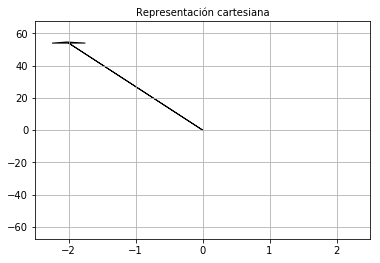

In [95]:
ax = plt.axes()

a = Complejo(-2, 54)
x = a.parteReal
y = a.parteImaginaria
ax.arrow(0, 0, x, y, head_width=0.5, head_length=0.7, fc='lightblue', ec='black')

plt.grid()
margenx  = abs(x*0.25)
margeny = abs(y*0.25)
plt.xlim(-abs(x)-margenx,abs(x)+ margenx)
plt.ylim(-abs(y)- margeny,abs(y)+ margeny)

plt.title('Representación cartesiana',fontsize=10)

plt.savefig('figura.png', bbox_inches='tight')
plt.show()
